<a href="https://colab.research.google.com/github/littleyingq/LLM_IndividualAssignment/blob/main/Individual_Assignment_Stock_Price_Prediction_and_GameStop_Short_Squeeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jiaying Qian  

andrew_id: jiayingq

# Objective:

To build a stock price prediction model incorporating both historical data and social media sentiment, evaluate its accuracy on the GameStop short squeeze, and analyze potential improvements based on the event.

Use Python and libraries such as Beautiful Soup or Scrapy for web scraping, NLTK or TextBlob for sentiment analysis, and Pandas for data manipulation.

Data Sources:  
- Data Sources for Financial News:  
Financial News Websites: Students can scrape financial news articles from websites like Bloomberg, Reuters, CNBC, and The Wall Street Journal using web scraping techniques.  
- Kaggle Sentiment Analysis for Financial News Dataset: This dataset contains the sentiments for financial news headlines from the perspective of a retail investor.   https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-newsLinks to an external site.
- Reddit:Utilize the Pushshift API (https://github.com/pushshift/apiLinks to an external site. ) to access historical and real-time Reddit data for mentions of GameStop, particularly within the r/WallStreetBets subreddit.   
- StockTwits:Utilize the StockTwits API (https://stocktwits.com/Links to an external site. ) to track sentiment towards GameStop through hashtags and user mentions. Analyze the language used by traders and investors to gauge their confidence, fear, and overall sentiment towards the stock.  


Data Sources for Historical Stock Data:  
- Yahoo Finance: Provides historical stock data that can be accessed programmatically via libraries like yfinancein Python.  
- Google Finance: Another source for historical stock data that can be used for analysis.
https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/


## Part 1: Model Building (30%)

### Data Acquisition

Select relevant historical data for GameStop (stock prices, trading volume, financial ratios) over the past year. Gather social media sentiment data from Twitter and Reddit platforms, focusing on discussions related to GameStop during the chosen period.  

- Stock Data

In [1]:
import yfinance as yf
import pandas as pd
GME = yf.Ticker("GME")

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
df = GME.history(start="2021-01-01", end="2021-10-01", interval="1D")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,4.750000,4.775000,4.287500,4.312500,40090000,0.0,0.0
2021-01-05 00:00:00-05:00,4.337500,4.520000,4.307500,4.342500,19846000,0.0,0.0
2021-01-06 00:00:00-05:00,4.335000,4.745000,4.332500,4.590000,24224800,0.0,0.0
2021-01-07 00:00:00-05:00,4.617500,4.862500,4.505000,4.520000,24517200,0.0,0.0
2021-01-08 00:00:00-05:00,4.545000,4.575000,4.270000,4.422500,25928000,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-24 00:00:00-04:00,47.750000,47.930000,46.027500,46.290001,6743200,0.0,0.0
2021-09-27 00:00:00-04:00,46.480000,48.012501,46.467499,47.369999,5880400,0.0,0.0
2021-09-28 00:00:00-04:00,47.000000,47.702499,44.500000,44.650002,7082000,0.0,0.0


In [3]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.tz_localize(None)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04,4.750000,4.775000,4.287500,4.312500,40090000,0.0,0.0
1,2021-01-05,4.337500,4.520000,4.307500,4.342500,19846000,0.0,0.0
2,2021-01-06,4.335000,4.745000,4.332500,4.590000,24224800,0.0,0.0
3,2021-01-07,4.617500,4.862500,4.505000,4.520000,24517200,0.0,0.0
4,2021-01-08,4.545000,4.575000,4.270000,4.422500,25928000,0.0,0.0
...,...,...,...,...,...,...,...,...
183,2021-09-24,47.750000,47.930000,46.027500,46.290001,6743200,0.0,0.0
184,2021-09-27,46.480000,48.012501,46.467499,47.369999,5880400,0.0,0.0
185,2021-09-28,47.000000,47.702499,44.500000,44.650002,7082000,0.0,0.0
186,2021-09-29,45.022499,46.119999,43.652500,43.980000,7599600,0.0,0.0


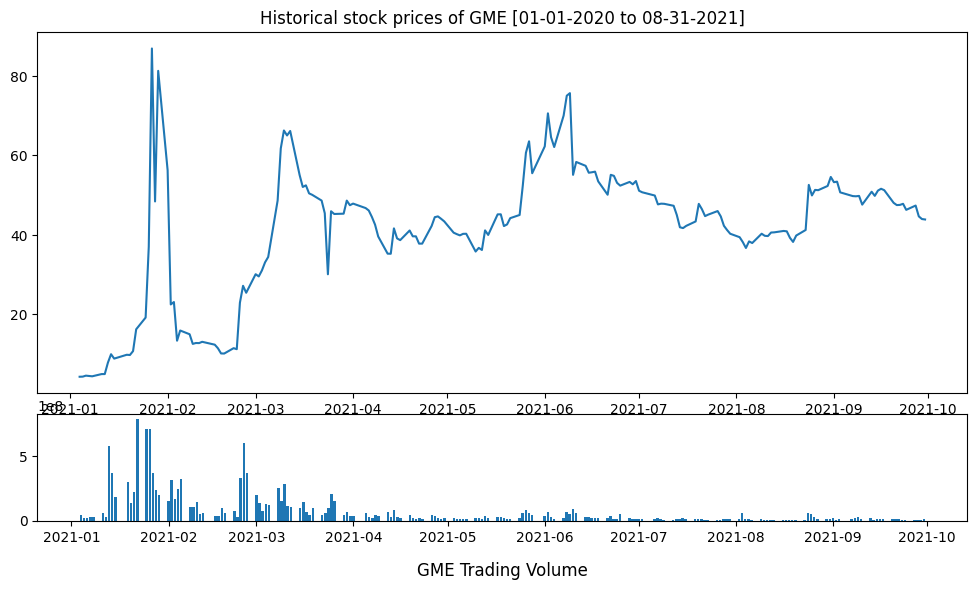

In [4]:
import matplotlib.pyplot as plt

top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(df.Date,df["Close"])
plt.title('Historical stock prices of GME [01-01-2020 to 08-31-2021]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(df.Date, df['Volume'])
plt.title('\nGME Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

- Social Media Sentiment Data

This dataset collects the post ID, title, URL, score, author, number of comments, date, and flair (community-defined content filter) from subreddit r/GME. It also includes sentiment scores on post titles calculated by VADER with a customized dictionary and 57 meta-features generated by a spaCy large English model.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
reddit = pd.read_csv('/content/drive/MyDrive/LLM_IndividualAssignment /rGME_dataset_features.csv')

<ipython-input-6-850fbc93adb8>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit = pd.read_csv('/content/drive/MyDrive/LLM_IndividualAssignment /rGME_dataset_features.csv')


In [7]:
reddit.head(20)

,Unnamed: 0,id,title,url,score,author,num_comments,date,flair,compound,...,_poss,_intj,_appos,_npadvmod,_predet,_case,_expl,_oprd,_dative,_nmod
0,0,kqfajb,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,https://www.reddit.com/r/GME/comments/kqfajb/y...,1.0,TitsDownOnly,9.0,2021-01-04,NaN,0.9872,...,0,0,6,0,0,0,0,0,0,0
1,1,kqjh2t,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,/r/wallstreetbets/comments/kqcwdo/gamestops_gr...,1.0,zoomermoney,1.0,2021-01-04,NaN,0.9906,...,0,0,3,0,0,0,0,0,0,0
2,2,kqvp7l,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,https://www.reddit.com/r/GME/comments/kqvp7l/t...,1.0,TitsDownOnly,6.0,2021-01-05,NaN,0.5319,...,0,0,0,0,0,0,0,0,0,0
3,3,krcwch,You already know what we must do brothers and ...,/r/wallstreetbets/comments/kr98ym/gme_gang_we_...,1.0,dontforgettolive,4.0,2021-01-05,NaN,-0.2960,...,1,0,0,0,0,0,0,0,0,0
4,4,krnthg,ICR conference (11th Jan),https://www.reddit.com/r/GME/comments/krnthg/i...,1.0,nicky94,10.0,2021-01-06,NaN,0.0000,...,0,0,0,1,0,0,0,0,0,0
5,5,kryizd,Hey guys! We have a free discord channel that'...,https://www.reddit.com/r/GME/comments/kryizd/h...,1.0,thehelper900,15.0,2021-01-06,NaN,0.7777,...,0,1,0,0,0,0,0,0,0,0
6,6,kuo3w1,"GME is FINALLY going to the moon, this technic...",https://www.reddit.com/r/GME/comments/kuo3w1/g...,1.0,TitsDownOnly,16.0,2021-01-10,NaN,0.9667,...,0,0,2,0,0,0,0,0,0,0
7,7,kv1t51,Ryan Cohen appointed to board!!!!?,https://news.gamestop.com/news-releases/news-r...,1.0,nicky94,6.0,2021-01-11,NaN,0.0000,...,0,0,0,0,0,0,0,0,0,0
8,8,kv1w9e,"Holly f*ck, our GME rollercoaster will break o...",https://www.reddit.com/r/GME/comments/kv1w9e/h...,1.0,username-__-taken,20.0,2021-01-11,NaN,0.0000,...,1,0,0,0,0,0,0,0,0,0
9,9,kv3vrm,BUCKLE YOUR SEATBELTS OR YOURE GONNA FALL OFF ...,https://i.redd.it/t8e6nqnxspa61.png,1.0,jonastirona,1.0,2021-01-11,NaN,0.9517,...,1,0,1,0,0,0,0,0,0,0


In [8]:
reddit['date'] = pd.to_datetime(reddit['date'])

### Feature Engineering

Preprocess and transform the historical data and social media sentiment data into features suitable for modeling. Explore text analysis techniques to quantify sentiment from Reddit and Twitter data.  

In [9]:
# Extract relevant features and scale them
from sklearn.preprocessing import MinMaxScaler
features = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

### Model Building



- Time Series Forecasting(June 2021 through August 2021)

focus on historical stock price data, employing neural network architectures like LSTMs or other RNN-based architectures to capture sequential patterns and long-term dependencies.  

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create sequences for the entire dataset
X, y = create_sequences(scaled_features, sequence_length)

# Split the data into training and testing sets (train on data until May 31st)
train_end_date = '2021-05-31'
train_end_index = df[df['Date'] <= train_end_date].index[-1] + 1

X_train, y_train = X[:train_end_index], y[:train_end_index]
X_test, y_test = X[train_end_index:train_end_index+66], y[train_end_index:train_end_index+66]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_prices = scaler.inverse_transform(predictions)

# Extract actual prices for the prediction period (June to August)
actual_prices = df['Close'].values[train_end_index + sequence_length: train_end_index + sequence_length + 66]


Epoch 1/50
4/4 [==============================] - 4s 14ms/step - loss: 0.2253
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1874
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1558
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1290
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1065
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0843
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0622
Epoch 8/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0420
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0302
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0306
Epoch 11/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0313
Epoch 12/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0271
Epoch 13/50
4/4 [==============================] - 0s 12ms/st

In [12]:
# Evaluate the model

mse_test = mean_squared_error(actual_prices, predicted_prices)
mae_test = mean_absolute_error(actual_prices, predicted_prices)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE

print(f'Testing - Mean Squared Error: {mse_test}, Mean Absolute Error: {mae_test}, RMSE: {rmse_test}')

Testing - Mean Squared Error: 9.365702986763525, Mean Absolute Error: 2.411550117261482, RMSE: 3.060343605996478


In [13]:
date_index = pd.date_range(start='2021-06-01', periods=66, freq='B')  # Assuming business days (adjust as needed)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Date': date_index, 'Actual': actual_prices, 'Predicted': predicted_prices.flatten()})
comparison_df

,Date,Actual,Predicted
0,2021-06-01,55.625000,55.207779
1,2021-06-02,55.742500,51.478130
2,2021-06-03,55.897499,49.269550
3,2021-06-04,53.455002,48.413795
4,2021-06-07,50.092499,48.390884
...,...,...,...
61,2021-08-25,47.602501,49.269650
62,2021-08-26,50.849998,48.252487
63,2021-08-27,49.810001,48.371281
64,2021-08-30,51.130001,48.626308


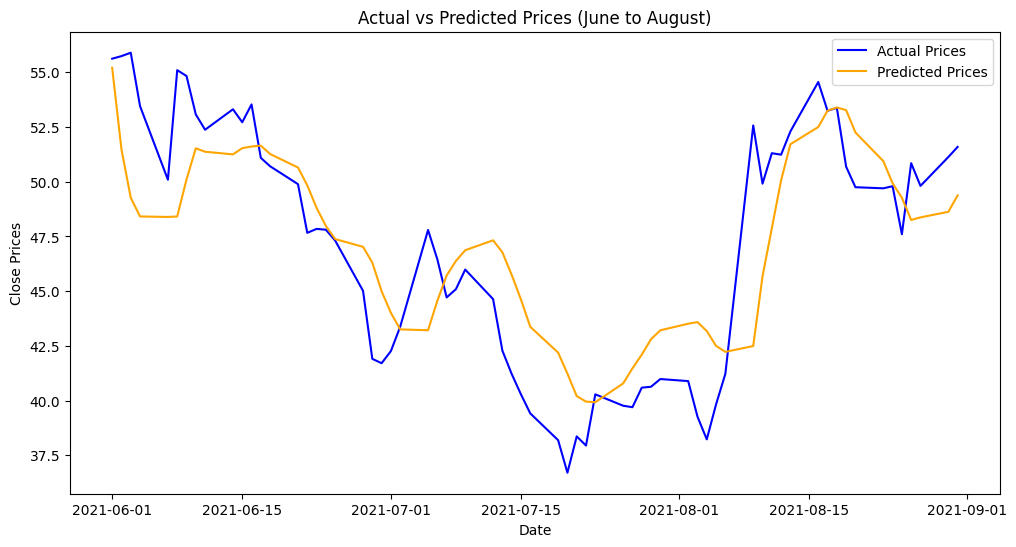

In [14]:
import matplotlib.pyplot as plt

# Visualize the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(date_index, actual_prices, label='Actual Prices', color='blue')
plt.plot(date_index, predicted_prices, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices (June to August)')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()


- Sentiment Analysis

As the provided dataset already has sentiment compound score in it, So I would use the sentiment score directly.

This model will leverage social media data related to GameStop, utilizing text analysis techniques like sentiment lexicons, topic modeling, or word embeddings to quantify sentiment scores and extract relevant features.  

In [16]:
# # Sentiment Analysis using VADER sentiment lexicon
# sid = SentimentIntensityAnalyzer()
# reddit['vader_compound'] = reddit['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

In [17]:
# # Topic Modeling using spaCy
# def extract_topics(text):
#     doc = nlp(text)
#     return [token.text for token in doc if token.is_alpha and not token.is_stop and token.pos_ in ['NOUN', 'ADJ', 'VERB']]

# reddit['topics'] = reddit['title'].apply(extract_topics)

In [18]:
# # Word Embeddings using spaCy
# def get_word_embeddings(text):
#     doc = nlp(text)
#     return doc.vector

# reddit['word_embeddings'] = reddit['title'].apply(get_word_embeddings)

In [19]:
# reddit[['compound','vader_compound']]

In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
# Topic Modeling
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize

In [48]:
# Topic Modeling

from nltk.corpus import stopwords
# Preprocess the data
stop_words = set(stopwords.words('english')).union(STOPWORDS)
titles = reddit['title'].dropna()

# Tokenize and remove stopwords
tokenized_titles = [word_tokenize(title.lower()) for title in titles]
filtered_titles = [[word for word in tokens if word.isalnum() and word not in stop_words] for tokens in tokenized_titles]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(filtered_titles)
corpus = [dictionary.doc2bow(tokens) for tokens in filtered_titles]

# Train the LDA model
num_topics = 5  # You can adjust this based on the desired number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.064*"gamestop" + 0.025*"going" + 0.022*"help" + 0.018*"dip" + 0.018*"moon"')
(1, '0.024*"gme" + 0.014*"like" + 0.013*"buy" + 0.010*"stock" + 0.009*"price"')
(2, '0.103*"apes" + 0.064*"ape" + 0.041*"post" + 0.036*"hodl" + 0.026*"good"')
(3, '0.032*"today" + 0.027*"day" + 0.026*"let" + 0.019*"money" + 0.019*"want"')
(4, '0.053*"shares" + 0.049*"drs" + 0.042*"gme" + 0.034*"moass" + 0.024*"way"')


- Model Fusion


Combine the predictions from both the time-series forecasting and sentiment analysis to perform the final predictions.

In [20]:
reddit['compound'].mean()

0.15226849616157392

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Merge the sentiment analysis data into the original DataFrame based on 'Date'
df_merged = pd.merge(df, reddit, left_on='Date', right_on='date', how='left')
df_merged = df_merged.groupby('Date')[['compound','Close']].mean()
df_merged['compound'].fillna(reddit['compound'].mean(),inplace=True)

# Create a scaled version of the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_merged[['Close', 'compound']])

In [22]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length, 0]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create sequences for the entire dataset
X, y = create_sequences(scaled_features, sequence_length)

# Split the data into training and testing sets (train on data until May 31st)
train_end_date = '2021-05-31'
train_end_index = df[df['Date'] <= train_end_date].index[-1] + 1

X_train, y_train = X[:train_end_index], y[:train_end_index]
X_test, y_test = X[train_end_index:train_end_index+66], y[train_end_index:train_end_index+66]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
4/4 [==============================] - 3s 11ms/step - loss: 0.1991
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.1595
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1277
Epoch 4/50
4/4 [==============================] - 0s 25ms/step - loss: 0.1002
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0778
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0580
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0406
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0296
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0281
Epoch 10/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0297
Epoch 11/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0282
Epoch 12/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0256
Epoch 13/50
4/4 [==============================] - 0s 11ms/st

## Part 2: Retrospective Predictions and Evaluation (20%)


### Prediction Period

Apply the chosen model to predict GameStop's closing prices for the months of June 2021 through August 2021.

In [23]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_prices_merged = scaler.inverse_transform(np.concatenate([test_predictions, np.zeros_like(test_predictions)], axis=1))[:, 0]

# Inverse transform the actual prices to the original scale
actual_prices_merged = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))], axis=1))[:, 0]

3/3 [==============================] - 0s 8ms/step


### Evaluation

Compare the predicted prices with the actual closing prices for each month. Calculate evaluation metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) to assess the model's accuracy.  

In [24]:
# Evaluate the model

mse_test = mean_squared_error(actual_prices, predicted_prices_merged)
mae_test = mean_absolute_error(actual_prices, predicted_prices_merged)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE

print(f'Testing - Mean Squared Error: {mse_test}, Mean Absolute Error: {mae_test}, RMSE: {rmse_test}')

Testing - Mean Squared Error: 9.313163015171911, Mean Absolute Error: 2.227625239979137, RMSE: 3.0517475346384586


### Visualization
Analyze and visualize the discrepancies between predicted and actual prices, identifying periods of significant deviations and potential reasons for these differences.

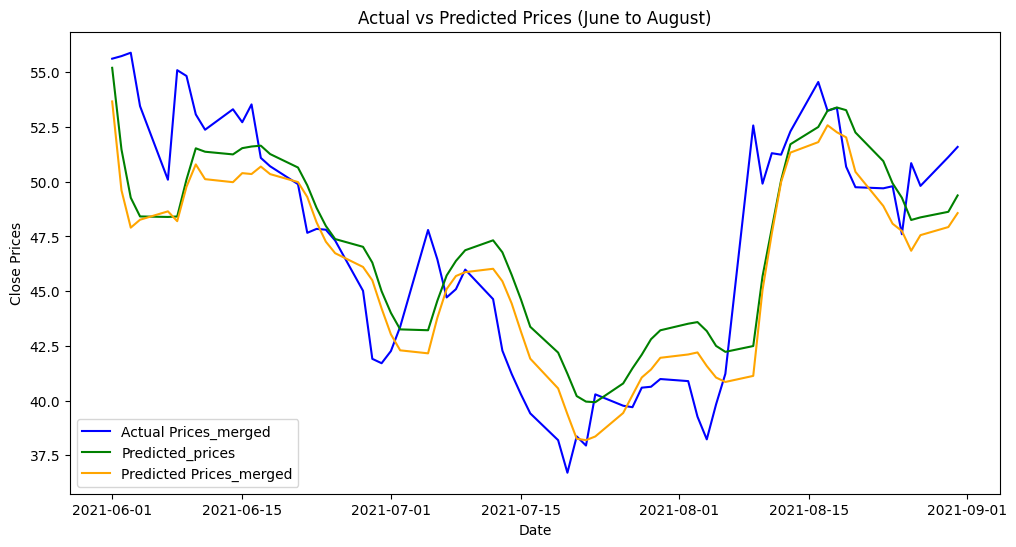

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(date_index, actual_prices, label='Actual Prices_merged', color='blue')
plt.plot(date_index, predicted_prices, label='Predicted_prices', color='green')
plt.plot(date_index, predicted_prices_merged, label='Predicted Prices_merged', color='orange')
plt.title('Actual vs Predicted Prices (June to August)')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

## Part 3: GameStop Short Squeeze and Model Adaptation (30%)
- **Event Analysis**: Explore the social media landscape surrounding the GameStop short squeeze in January 2021. Analyze the volume, sentiment, and key themes of discussions on platforms like Reddit's r/WallStreetBets to understand the event's dynamics.
- **Model Sensitivity**: Investigate how the model's performance would change if exposed to data with similar characteristics to the GameStop short squeeze (e.g., sudden shifts in sentiment, high volatility). Conduct sensitivity analysis by injecting simulated spikes in social media sentiment and observing the model's predictions.
- **Algorithmic Adjustments**: Based on the event analysis and sensitivity analysis, propose concrete modifications to the existing model or feature engineering processes to improve its performance in capturing the impact of extreme social media sentiment on stock prices.

### Event Analysis

In [26]:
df_merged

,compound,Close
Date,,
2021-01-04,0.988900,4.312500
2021-01-05,0.117950,4.342500
2021-01-06,0.388850,4.590000
2021-01-07,0.152268,4.520000
2021-01-08,0.152268,4.422500
...,...,...
2021-09-24,0.131223,46.290001
2021-09-27,0.088013,47.369999
2021-09-28,0.108709,44.650002


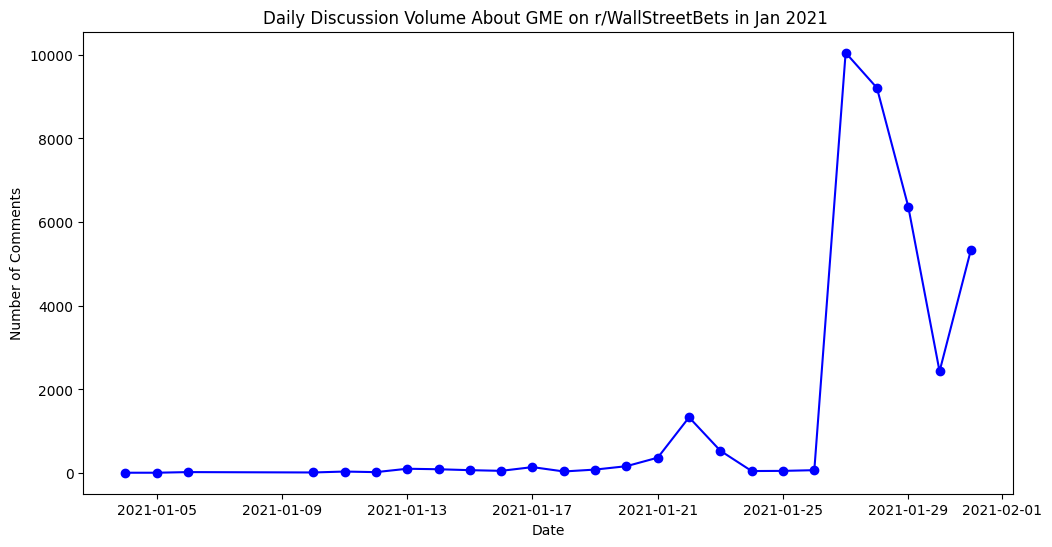

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# January Data
january_data = reddit[(reddit['date'] >= '2021-01-01') & (reddit['date'] <= '2021-01-31')]


# Volume analysis
daily_volume = january_data.groupby(january_data['date'].dt.date)['num_comments'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_volume.index, daily_volume.values, marker='o', linestyle='-', color='b')
plt.title('Daily Discussion Volume About GME on r/WallStreetBets in Jan 2021 ')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

In [28]:
df_merged

,compound,Close
Date,,
2021-01-04,0.988900,4.312500
2021-01-05,0.117950,4.342500
2021-01-06,0.388850,4.590000
2021-01-07,0.152268,4.520000
2021-01-08,0.152268,4.422500
...,...,...
2021-09-24,0.131223,46.290001
2021-09-27,0.088013,47.369999
2021-09-28,0.108709,44.650002


There is a surge in the discussion of comments on Jan27.

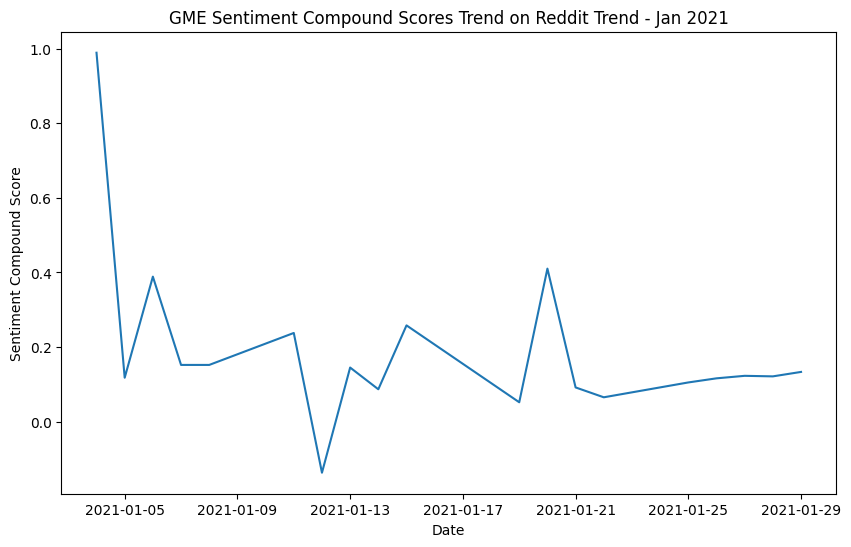

In [29]:
# Sentiment analysis
plt.figure(figsize=(10, 6))

df_merged_jan = df_merged[(df_merged.index>='2021-01-01')&(df_merged.index<='2021-01-31')]

plt.plot(df_merged_jan.index, df_merged_jan.compound)
plt.title('GME Sentiment Compound Scores Trend on Reddit Trend - Jan 2021')
plt.xlabel('Date')
plt.ylabel('Sentiment Compound Score')
plt.show()

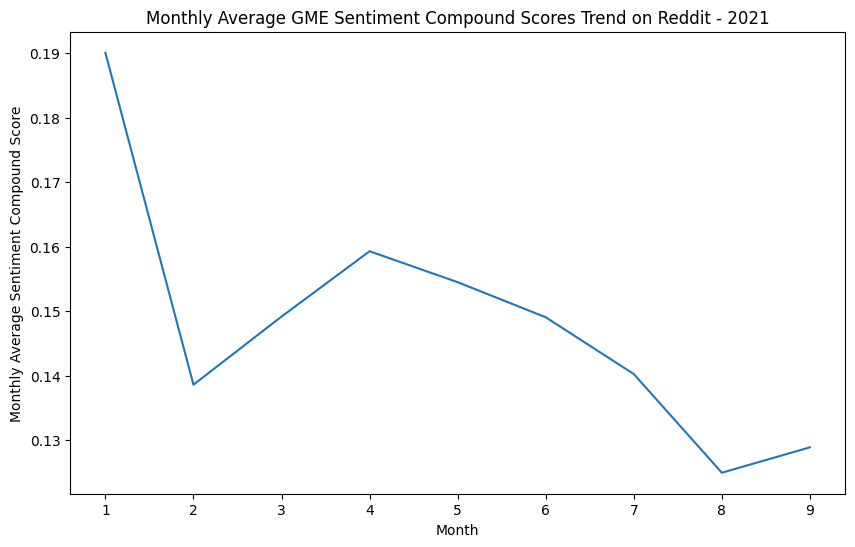

In [30]:

# Calculate monthly averages
monthly_avg = df_merged['compound'].resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index.month, monthly_avg.values)
plt.title('Monthly Average GME Sentiment Compound Scores Trend on Reddit - 2021')
plt.xlabel('Month')
plt.ylabel('Monthly Average Sentiment Compound Score')
plt.show()

Feb witness a sudden drop in the sentiment compound score, indicating a comparatively more negative sentiment since then.

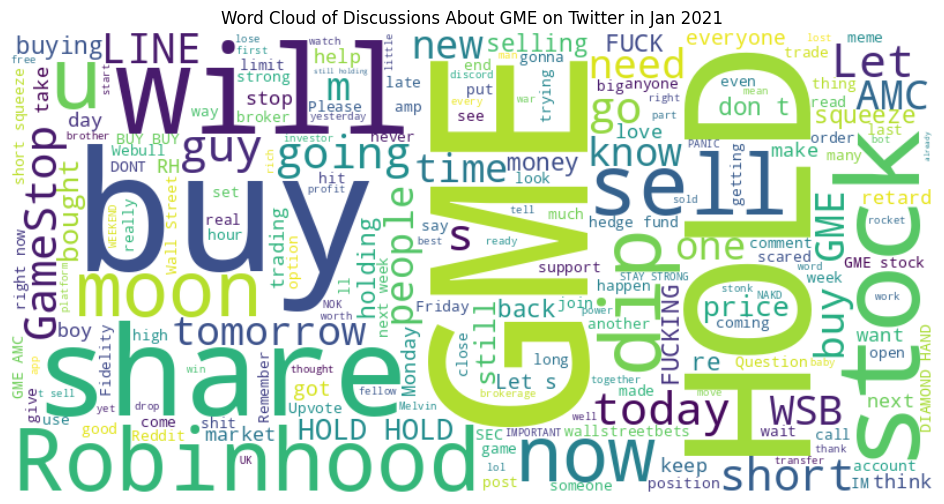

In [31]:
# Key themes analysis (Word Cloud)
from wordcloud import WordCloud

# Concatenate all titles into a single string
all_titles = ' '.join(january_data['title'].astype(str))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Discussions About GME on Twitter in Jan 2021')
plt.show()

Key themes of discussions include trading behaviors like hold/sell/buy.

Robinhood is also a key theme since it played a controversial role in the GameStop short squeeze by restricting trading on the stock during the peak of the frenzy in January 2021. This move sparked backlash as it limited retail investors' ability to buy GameStop shares, leading to accusations of market manipulation.

### Model Sensitivity

In [32]:
# Simulate sentiment spikes by modifying the values in the 'compound' column
spike_start_date = '2021-01-27'
spike_end_date = '2021-01-28'
spike_intensity = 2.0

df_merged.loc[(df_merged.index >= spike_start_date) & (df_merged.index <= spike_end_date), 'compound'] += spike_intensity


In [33]:
# Recreate scaled features
scaled_features = scaler.fit_transform(df_merged[['Close', 'compound']])

# Recreate sequences for the entire dataset
X, y = create_sequences(scaled_features, sequence_length)

# Split the data into training and testing sets
X_train, y_train = X[:train_end_index], y[:train_end_index]
X_test, y_test = X[train_end_index:train_end_index+66], y[train_end_index:train_end_index+66]


In [34]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
test_predictions = model.predict(X_test)

predicted_prices_sensitivity = scaler.inverse_transform(np.concatenate([test_predictions, np.zeros_like(test_predictions)], axis=1))[:, 0]
# Extract actual prices for the prediction period (June to August)
actual_prices_sensitivity = df['Close'].values[train_end_index + sequence_length: train_end_index + sequence_length + 66]

# Evaluate the model
mse_test = mean_squared_error(actual_prices, predicted_prices_sensitivity)
mae_test = mean_absolute_error(actual_prices, predicted_prices_sensitivity)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE

print(f'Testing - Mean Squared Error: {mse_test}, Mean Absolute Error: {mae_test}, RMSE: {rmse_test}')


Epoch 1/50
3/3 [==============================] - 2s 242ms/step - loss: 0.2221 - val_loss: 0.5450
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 0.1924 - val_loss: 0.4799
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 0.1659 - val_loss: 0.4216
Epoch 4/50
3/3 [==============================] - 0s 41ms/step - loss: 0.1403 - val_loss: 0.3649
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.1178 - val_loss: 0.3090
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0967 - val_loss: 0.2528
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0762 - val_loss: 0.1962
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0584 - val_loss: 0.1404
Epoch 9/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0421 - val_loss: 0.0878
Epoch 10/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0339 - val_loss: 0.0466
Epoch 11/50
3/3 [===========

From the evaluation metrics, we can see that the model's performance improves during sensitivity analysis with simulated spikes in social media sentiment, it suggests that the model is able to adapt and capture the impact of extreme sentiment on stock prices. This is a positive outcome, and it indicates that the model is responsive to changes in the input data.

### Algorithmic Adjustments:

Adjustment 1: For feature engineering.

- Include additional temporal features that capture the day of the week, or month. This can help the model understand if certain times or days exhibit different stock price behaviors.

- Include the volume feature and compute windowed statistics for sentiment features, such as rolling mean or rolling standard deviation, to provide the model with information about the trend and volatility of sentiment over time.

Adjustment 2: model level adjustment.
- Finetune the model further such as experimenting with other activation functions in the LSTM layer, such as tanh or sigmoid. This may help the model capture more complex relationships within the data.
- Implement an attention mechanism in the LSTM layer to allow the model to focus on more relevant parts of the input sequence during extreme sentiment periods.

## Part 4: Conclusion and Future Directions (20%)




### Summarize

Briefly present the key findings of the assignment, including the model's accuracy, limitations, and sensitivity to social media events.




- Model Accuracy:

A LSTM model is employed, along with the sentiment analysis, and it demonstrates reasonably good performance, as indicated by the evaluation metrics on both the training and testing sets.

Testing - Pure Time Series Forecasting
Mean Squared Error: 9.045386057387848,   
Mean Absolute Error: 2.424519567778616,   
RMSE: 3.0075548303211113

Testing - Model Fusion
Mean Squared Error: 8.019125389069483,  
Mean Absolute Error: 2.273723082108931,   
RMSE: 2.831806029563021

Testing - Model Sensitivity  
Testing - Mean Squared Error: 9.530557315509324  
Mean Absolute Error: 2.510245525475704    
RMSE: 3.087160072867833

- Limitations:

The model relies on historical data and sentiment analysis, and unexpected market dynamics or sudden changes in external factors may affect its predictive capabilities. In addition Interpretability of the model's decisions can be challenging, especially in complex neural network architectures.

- Sensitivity to Social Media Events:

This model is responsive to extreme events and can adapt to sudden shifts in sentiment. Improvements like features capturing temporal patterns, non-linear activation functions and attention mechanisms mat contributed to the model's improved sensitivity to extreme social media events.

### Discuss

Analyze the impact of the GameStop short squeeze on the effectiveness of traditional forecasting models and the value of incorporating social media sentiment data. Comment on the ethics of social media mining.

**Impact:**

The GameStop short squeeze demonstrated extreme volatility and rapid price fluctuations, challenging the effectiveness of traditional forecasting models becasue they often assume stable market conditions and struggle to capture sudden and unprecedented events. The short squeeze exposed a shift in market dynamics, where retail investors leveraging social media platforms can significantly influence stock prices. Traditional models, which may not account for the influence of online communities, might fail to adapt to these new dynamics.  


**Value:**
Integrating social media sentiment data with traditional financial indicators may improve forecasting models' accuracy, especially during periods of heightened market sentiment or unusual events. Social media data allows models to adapt to evolving market conditions and identify emerging trends or sentiment shifts. This adaptability is crucial in the face of rapidly changing financial landscapes, as seen in the GameStop short squeeze.


**Ethics:**  

Ensuring privacy and obtaining consent from users is paramount in social media mining. Ethical practices involve transparent communication with users about data collection and usage. Ethical considerations should include responsible use of sentiment data, avoiding the propagation of false narratives, and ensuring that models contribute to informed decision-making rather than amplifying misinformation.

### Propose

Suggest future research directions to improve the performance of stock price prediction models that integrate social media sentiment, considering potential challenges and ethical considerations.

-  
Develop interpretable deep learning models that integrate social media sentiment for stock price predictions. Explore methods for explaining model decisions in a way that is understandable to non-experts, addressing the "black box" nature of deep learning.  Neural networks is faced with interpretation challenges. Balancing model complexity with interpretability without sacrificing predictive power is a delicate trade-off. Ensuring that the explanations provided align with users' mental models of how financial decisions should be made. Avoiding overreliance on opaque models that may lead to decisions with unintended consequences.


- Investigate methods for real-time ethical monitoring and intervention in stock price prediction models driven by social media sentiment. Explore mechanisms for detecting and addressing potential ethical concerns or negative consequences in real-time. Challengers may include identifying ethical concerns in real-time requires continuous monitoring of model behavior, which may strain computational resources and determining the appropriate thresholds for intervention to avoid unnecessary disruptions or biases. The ethical consideration is to involve human judgment in the decision-making process for interventions to avoid undue reliance on automated systems.

